### 1、Import tensorflow and use tensorflow to define a constant.

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### 2、Use tensorflow to print 'Welcome to Huawei'.

In [2]:
welcome = tf.constant('Welcome to Huawei')

In [3]:
sess = tf.Session()
print(sess.run(welcome))
sess.close()  

b'Welcome to Huawei'


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [4]:
a = tf.constant(5)
b = tf.constant(6)

with tf.Session() as sess:
    print(sess.run(a + b))

11


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [5]:
sess = tf.InteractiveSession()

random1 = tf.Variable(tf.random_normal([4, 3], mean=1.0, stddev=1.0))
random2 = tf.Variable(tf.random_normal([3, 4], mean=1.0, stddev=1.0))

tf.global_variables_initializer().run()

mult = tf.matmul(random1, random2)
print(sess.run(mult))
sess.close()

[[6.1242414 1.4868115 7.298416  4.4238605]
 [6.5779    2.8063903 5.14013   5.2800756]
 [7.731074  3.384617  5.1488037 5.2352395]
 [8.266962  4.8080864 3.6336565 7.2424107]]


### 5、Try to use your own handwriting number to do image recognition

Импортируем датасет, оболочку модели, слои и утилзы

In [6]:
from keras.datasets import mnist # Импортируем датасет
from keras.models import Model # стандартный класс для построения нашей модели
from keras.layers import Input, Dense # используем начальный слой и след слои
from keras.utils import np_utils # утилиты для one-hot encoding

Using TensorFlow backend.


Задаем настройки нашей модели

In [12]:
batch_size = 128 # наш размер батча
num_epochs = 10 # количество итераций
hidden_size = 512 # будет 512 нейронов в 2х скрытых слоях

In [23]:
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1 # делаем размерность 28 х 28 в grayscale
num_classes = 10 # количество классов наших цифр

(X_train, y_train), (X_test, y_test) = mnist.load_data() # разбиваем на train/test

X_test_pic = X_test
X_train = X_train.reshape(num_train, height * width) # растягиваем наш датасет в 1D
X_test = X_test.reshape(num_test, height * width) # растягиваем наш датасет в 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Нормализуем данные
X_test /= 255 # Нормализуем данные

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode

In [9]:
inp = Input(shape=(height * width,)) # Создаем первоначальный слой в количестве 784 нейронов
hidden_1 = Dense(hidden_size, activation='relu')(inp) # ставим на первый слой активацию Relu
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # на второй слой Relu
out = Dense(num_classes, activation='softmax')(hidden_2) # применяем на конце softmax для распознавания классов

model = Model(inp, out) # Собираем модель

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)
model.evaluate(X_test, Y_test, verbose=1) # Оцениваем нашу модель

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 162us/step - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.0723 - val_accuracy: 0.9797
Epoch 2/10
54000/54000 [==============================] - 9s 159us/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0810 - val_accuracy: 0.9800
Epoch 3/10
54000/54000 [==============================] - 9s 160us/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0809 - val_accuracy: 0.9807
Epoch 4/10
54000/54000 [==============================] - 9s 160us/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0795 - val_accuracy: 0.9808
Epoch 5/10
54000/54000 [==============================] - 9s 161us/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0875 - val_accuracy: 0.9803
Epoch 6/10
54000/54000 [==============================] - 9s 161us/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0802 - val_accuracy: 0.9813
Epoch 7/10
54000/54000 [==============================] - 9s 16

[0.09010475794177827, 0.9800000190734863]

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

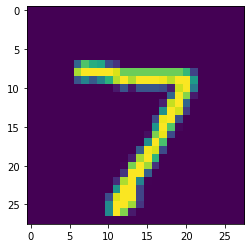

In [25]:
plt.imshow(X_test_pic[0])

In [30]:
y_test[0]

7

In [34]:
pred = model.predict(X_test, batch_size=batch_size, verbose=1)
idx = np.argmax(pred)
print('The answer is: ', idx)

10000/10000 [==============================] - 0s 46us/step
The answer is:  7
